# Week 1 Mini-Project — Titanic Exploratory Data Analysis (EDA)

This notebook explores the Titanic dataset to understand passenger demographics, fare and age distributions, and how factors such as sex, passenger class, and age group relate to survival.

This work is part of my 12-week Data Science / ML roadmap (Week 1).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Optional: nicer default style
plt.style.use("seaborn-v0_8")

# Display settings
pd.set_option("display.max_columns", None)

In [3]:
# Adjust the path if needed
df = pd.read_csv("data/train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Data Overview

In this section, I will:
- Inspect the dataset shape
- Check basic info (types, non-null counts)
- Look at missing values
- Get simple summary statistics


In [4]:
# Shape: rows, columns
df.shape


(891, 12)

In [5]:
# Basic info: dtypes and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Missing values per column
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Basic statistics for numeric columns
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Data Description

**Key columns to focus on:**

- `Survived` — 0 = did not survive, 1 = survived  
- `Pclass` — passenger class (1 = upper, 2 = middle, 3 = lower)  
- `Sex` — male or female  
- `Age` — passenger age in years  
- `Fare` — ticket fare paid  
- `Embarked` — port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Here I briefly describe the variables I will use in the analysis.

- The dataset contains demographic, ticket, and survival information for Titanic passengers.
- Key features include Age, Fare, Passenger Class (Pclass), Sex, and Survival status.
- Several columns contain missing data (particularly Age and Cabin), which must be handled before modeling.


In [8]:
# Create AgeGroup: Child (<18) vs Adult (>=18)
df.loc[df["Age"] < 18, "AgeGroup"] = "Child"
df.loc[df["Age"] >= 18, "AgeGroup"] = "Adult"

df["AgeGroup"].value_counts(dropna=False)


AgeGroup
Adult    601
NaN      177
Child    113
Name: count, dtype: int64

## 3. Distribution Analysis

In this section, I will:
- Visualize the distribution of Age
- Visualize the distribution of Fare
- Comment on skewness, outliers, and general patterns


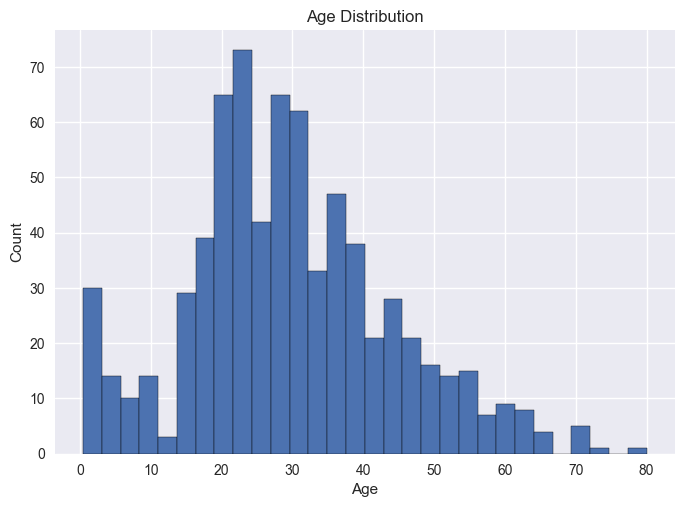

In [9]:
plt.hist(df["Age"].dropna(), bins=30, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


- The Age distribution is uneven, with most passengers concentrated in the adult range and far fewer children aboard the ship.
- The shape of the distribution suggests a wide age range overall, indicating that passengers of all ages were represented on the Titanic.


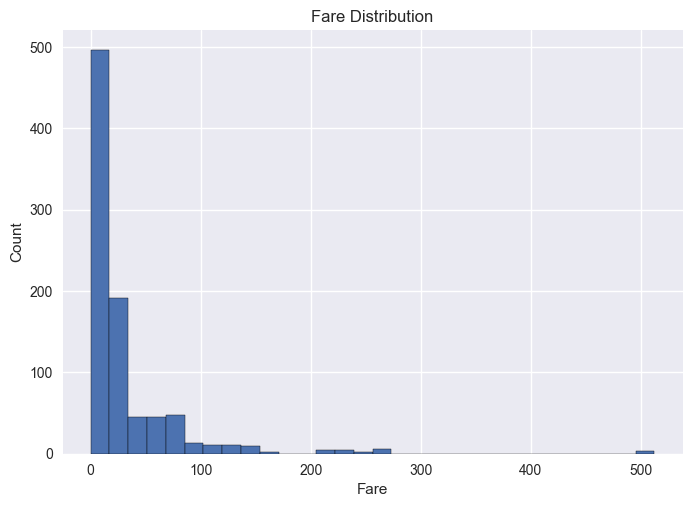

In [10]:
plt.hist(df["Fare"].dropna(), bins=30, edgecolor="black")
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


- The Fare distribution is heavily right-skewed, with most passengers paying relatively low ticket prices.
- A small number of passengers paid extremely high fares, creating clear outliers on the far right of the distribution.
- The wide range and uneven spread of Fare values reflect strong socio-economic differences between passenger classes.


## 4. Passenger Demographics

Here I will examine:
- Passenger counts by Sex
- Passenger counts by Pclass
- Passenger counts by AgeGroup (Child vs Adult)


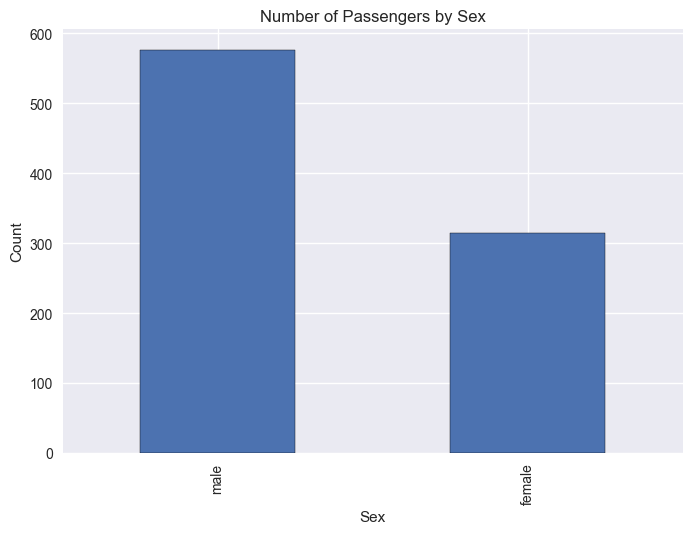

In [11]:
df["Sex"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Number of Passengers by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


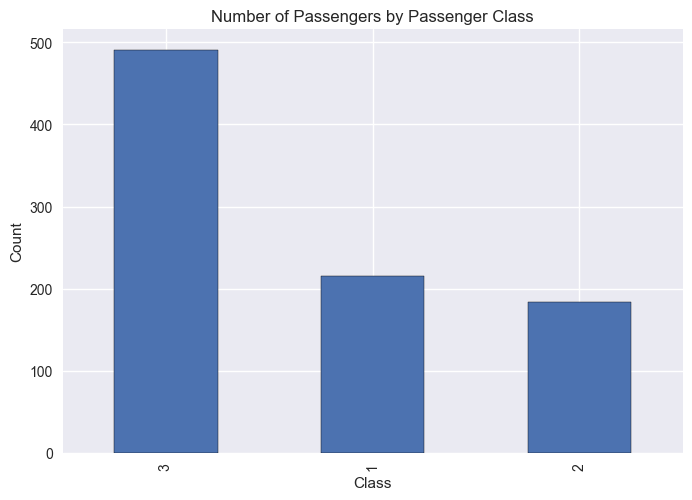

In [12]:
df["Pclass"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Number of Passengers by Passenger Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


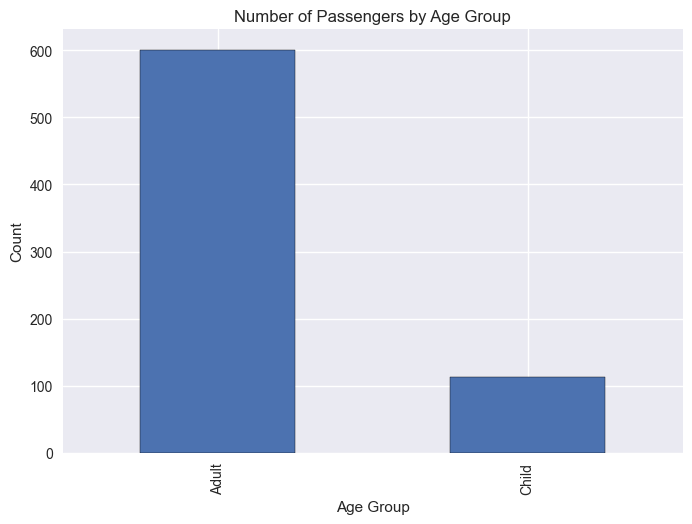

In [15]:
df["AgeGroup"].value_counts(dropna=True).plot(kind="bar", edgecolor="black")
plt.title("Number of Passengers by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


## 5. Survival Patterns

In this section, I will explore:
- Survival rate by Sex
- Survival rate by Pclass
- Survival rate by AgeGroup
- Survival counts for children vs adults


In [17]:
# Survival rate by Sex
survival_by_sex = df.groupby("Sex")["Survived"].mean() * 100
survival_by_sex


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

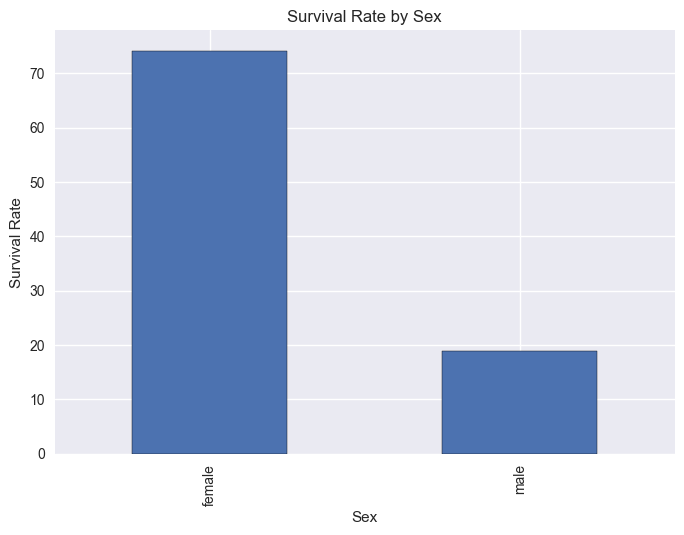

In [18]:
survival_by_sex.plot(kind="bar", edgecolor="black")
plt.title("Survival Rate by Sex")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.show()


In [20]:
# Survival rate by Pclass
survival_by_class = df.groupby("Pclass")["Survived"].mean() * 100
survival_by_class


Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

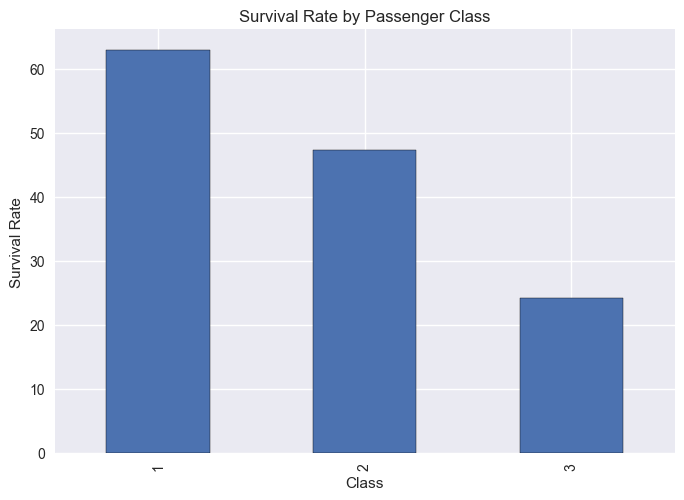

In [21]:
survival_by_class.plot(kind="bar", edgecolor="black")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Class")
plt.ylabel("Survival Rate")
plt.show()


In [23]:
# Survival rate by AgeGroup
survival_by_agegroup = df.groupby("AgeGroup")["Survived"].mean() * 100
survival_by_agegroup


AgeGroup
Adult    38.103161
Child    53.982301
Name: Survived, dtype: float64

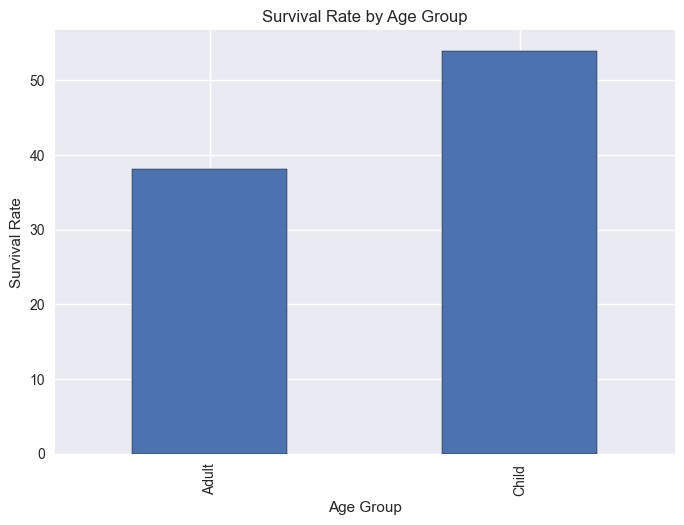

In [24]:
survival_by_agegroup.plot(kind="bar", edgecolor="black")
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show()


## 6. Missing Values Analysis

Here I briefly examine:
- How many values are missing in each column
- The percentage of missing values
- Which columns are most affected (especially Age and Cabin)


In [25]:
missing_count = df.isna().sum()
missing_percentage = (missing_count / len(df)) * 100

missing_df = pd.DataFrame({
    "missing_count": missing_count,
    "missing_percentage": missing_percentage
})

missing_df


,missing_count,missing_percentage
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


## 7. Key Findings

- The Age distribution indicates that the majority of passengers were adults, with children representing a smaller proportion of the population. A substantial number of Age values are missing, which will require careful handling in later modeling steps.
- The Fare distribution is highly right-skewed, with most passengers paying relatively low fares and a small number paying exceptionally high amounts. These outliers suggest significant socio-economic differences among passengers.
- Survival outcomes vary strongly by demographic and socio-economic factors. Females and first-class passengers demonstrated notably higher survival rates, while males and lower-class passengers had substantially lower survival rates.
- Children under 18 show survival characteristics distinct from adults, reinforcing the idea that age influenced evacuation priority.
- Several features, particularly Age and Cabin, exhibit high missingness, highlighting the need for imputation or feature reduction techniques before building predictive models.


## 8. Limitations and Next Steps

### **Limitations**
- The dataset contains substantial missing values, particularly in the Age and Cabin columns, which limits the completeness of certain analyses and may introduce bias if not addressed properly.
- Cabin data is largely unavailable, preventing meaningful spatial or location-based analysis of passengers aboard the ship.
- Some variables, such as Ticket and Name, require significant preprocessing and feature engineering to extract useful information for modeling.

### **Next Steps**
- Implement appropriate strategies for handling missing data, including Age imputation using statistical or model-based approaches.
- Engineer additional features such as Family Size, Title extraction from passenger names, and Fare normalization to improve predictive model performance.
- Prepare the dataset for machine-learning workflows by encoding categorical variables, scaling numerical features, and splitting the data into training and test sets.
- Begin building baseline predictive models (e.g., Logistic Regression, Decision Trees, Random Forests) to evaluate which features are most influential in survival predictions.